In [776]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [777]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

File ‘imageNetLabels.py’ already there; not retrieving.



In [801]:

import tensorflow as tf  
# Display the version
print(tf.__version__)    
import  imageNetLabels
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
# from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input

from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split

2.7.0


In [802]:
dictionary = imageNetLabels.IMAGENET_CLASSES

In [803]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


In [804]:
# base_model_NASNetMobile = NASNetMobile(weights="imagenet")


In [805]:
# base_model_NASNetLarge = NASNetLarge(weights="imagenet")  ## (331, 331, 3) 

In [806]:
# base_model_NASNetMobile.summary() ## z

In [807]:
# i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
# core = tf.keras.applications.MobileNet()
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# image = tf.image.decode_png(tf.io.read_file('file.png'))
# result = model(image)

In [887]:
mobile = (224, 224, 3)
large  = (331, 331 ,3)
def get_model_classif_nasnet():
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' )
    base_model.traainable = False
    x = base_model(xxx)
    out3 = GlobalAveragePooling2D()(x)
    # out2 = GlobalAveragePooling2D()(x)
    # out3 = Flatten()(gmp)
    # out = Concatenate(axis=-1)([out1, out2, out3])
    out2 = Dense(1056, activation=tf.keras.activations.relu, name="3_")(out3)
    out1 = Dropout(0.5)(out2)
    out = Dense(1000, activation=tf.keras.activations.softmax, name="1_")(out1)

    model = Model(inputs, out)

    # for l in model.layers[:-2]:
    # #print(l)
    #   l.trainable = False
    model.summary(  )

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

    return model

In [888]:
model = get_model_classif_nasnet()


Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_85 (InputLayer)       [(None, 331, 331, 3)]     0         
                                                                 
 tf.cast_43 (TFOpLambda)     (None, 331, 331, 3)       0         
                                                                 
 tf.math.truediv_43 (TFOpLam  (None, 331, 331, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_43 (TFOpLa  (None, 331, 331, 3)      0         
 mbda)                                                           
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 global_average_pooling2d_26  (None, 4032)             0  

In [889]:
# model.fit_generator(train_generator,steps_per_epoch=5176//128,validation_data=valid_generator,validation_steps=1293//128,epochs=2)

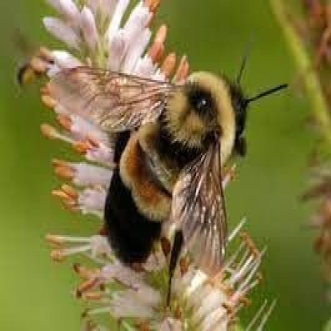

In [890]:
import cv2
img = cv2.imread('bee1.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
mobileDim = (224, 224 )
largeDim = (331 ,331)
resized = cv2.resize(img, largeDim, interpolation = cv2.INTER_AREA)

resized.shape
cv2_imshow(resized)


In [891]:
# indices = np.where(Y_train == 2)
# y_train_bird = Y_train[indices]
# x_train_bird = X_train[indices]
shape_large = (1 , 331 ,331 , 3)
shape_mobile = (1, 224 , 224, 3)
y_book = 309
y_book_hot = tf.keras.utils.to_categorical(y_book, num_classes=1000, dtype='float32')
x_book = resized
y_book_hot = np.reshape(y_book_hot , (1,1000))
x_book = np.reshape( x_book , shape_large)

In [892]:
BS=32
EPOCHS = 2
h5_path = "transferred_model.h5"
# augmented = np.empty((100 , 224 , 224 , 3))
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.1, shear_range=0.15,
	horizontal_flip=True,  fill_mode="nearest")


generator = aug.flow(x_book, y_book_hot ,batch_size=BS )
history = model.fit_generator( generator,   epochs = EPOCHS  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/2
1/1 [==============================] - 48s 48s/step - loss: 6.5244 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 5s 5s/step - loss: 1.8872 - acc: 1.0000


In [893]:
np.argmax(model.predict(x_book))

309

In [894]:
arr = model.predict(x_book)

In [895]:
tf.keras.applications.nasnet.decode_predictions(
    arr, top=5 )

[[('n02206856', 'bee', 0.99976856),
  ('n02356798', 'fox_squirrel', 3.5140768e-06),
  ('n09229709', 'bubble', 3.2918892e-06),
  ('n04049303', 'rain_barrel', 2.4269862e-06),
  ('n04443257', 'tobacco_shop', 2.298609e-06)]]

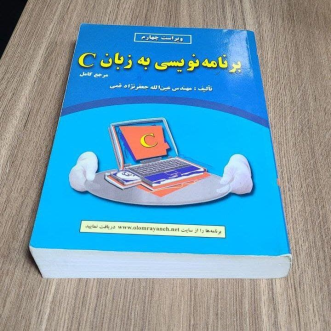

array([309, 986, 756])

In [896]:
import cv2
img = cv2.imread('dumb.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
# dim = (224, 224 )

resized = cv2.resize(img, largeDim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

resized = np.reshape( resized , shape_large)
# resized.shape
arr = model.predict(resized)
aaa = arr.reshape((1000,))
aaa.argsort()[-3:][::-1]

In [897]:
tf.keras.applications.nasnet.decode_predictions(
    arr, top=5 )

[[('n02206856', 'bee', 0.46665686),
  ('n12057211', "yellow_lady's_slipper", 0.0021663946),
  ('n04049303', 'rain_barrel', 0.0021155823),
  ('n04443257', 'tobacco_shop', 0.0019422517),
  ('n02009912', 'American_egret', 0.001939026)]]

banjo 420

fly 308

bee 309

barometer 426